In [ ]:
!pip install qiskit ipywidgets
!pip install qiskit qiskit-ibm-runtime
!pip install qiskit[visualization]
!pip install qiskit-aer


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.0/8.0 MB 64.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 83.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 kB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 73.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 21.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 374.8/374.8 kB 23.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.8/75.8 kB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.2/130.2 kB 7.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 4.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pylatexenc: filename=pylatexenc-2.10-py3-none-any.whl size=136817 sha256=aca65c4393fae2ef16943e1162c62640329245a3b37ace1e98a7e4a965563471
  Stored in directory: /root/.cache/pip/wheels/06/3e/78/fa1588c1ae991bbfd814af2bcac6cef7a178bee

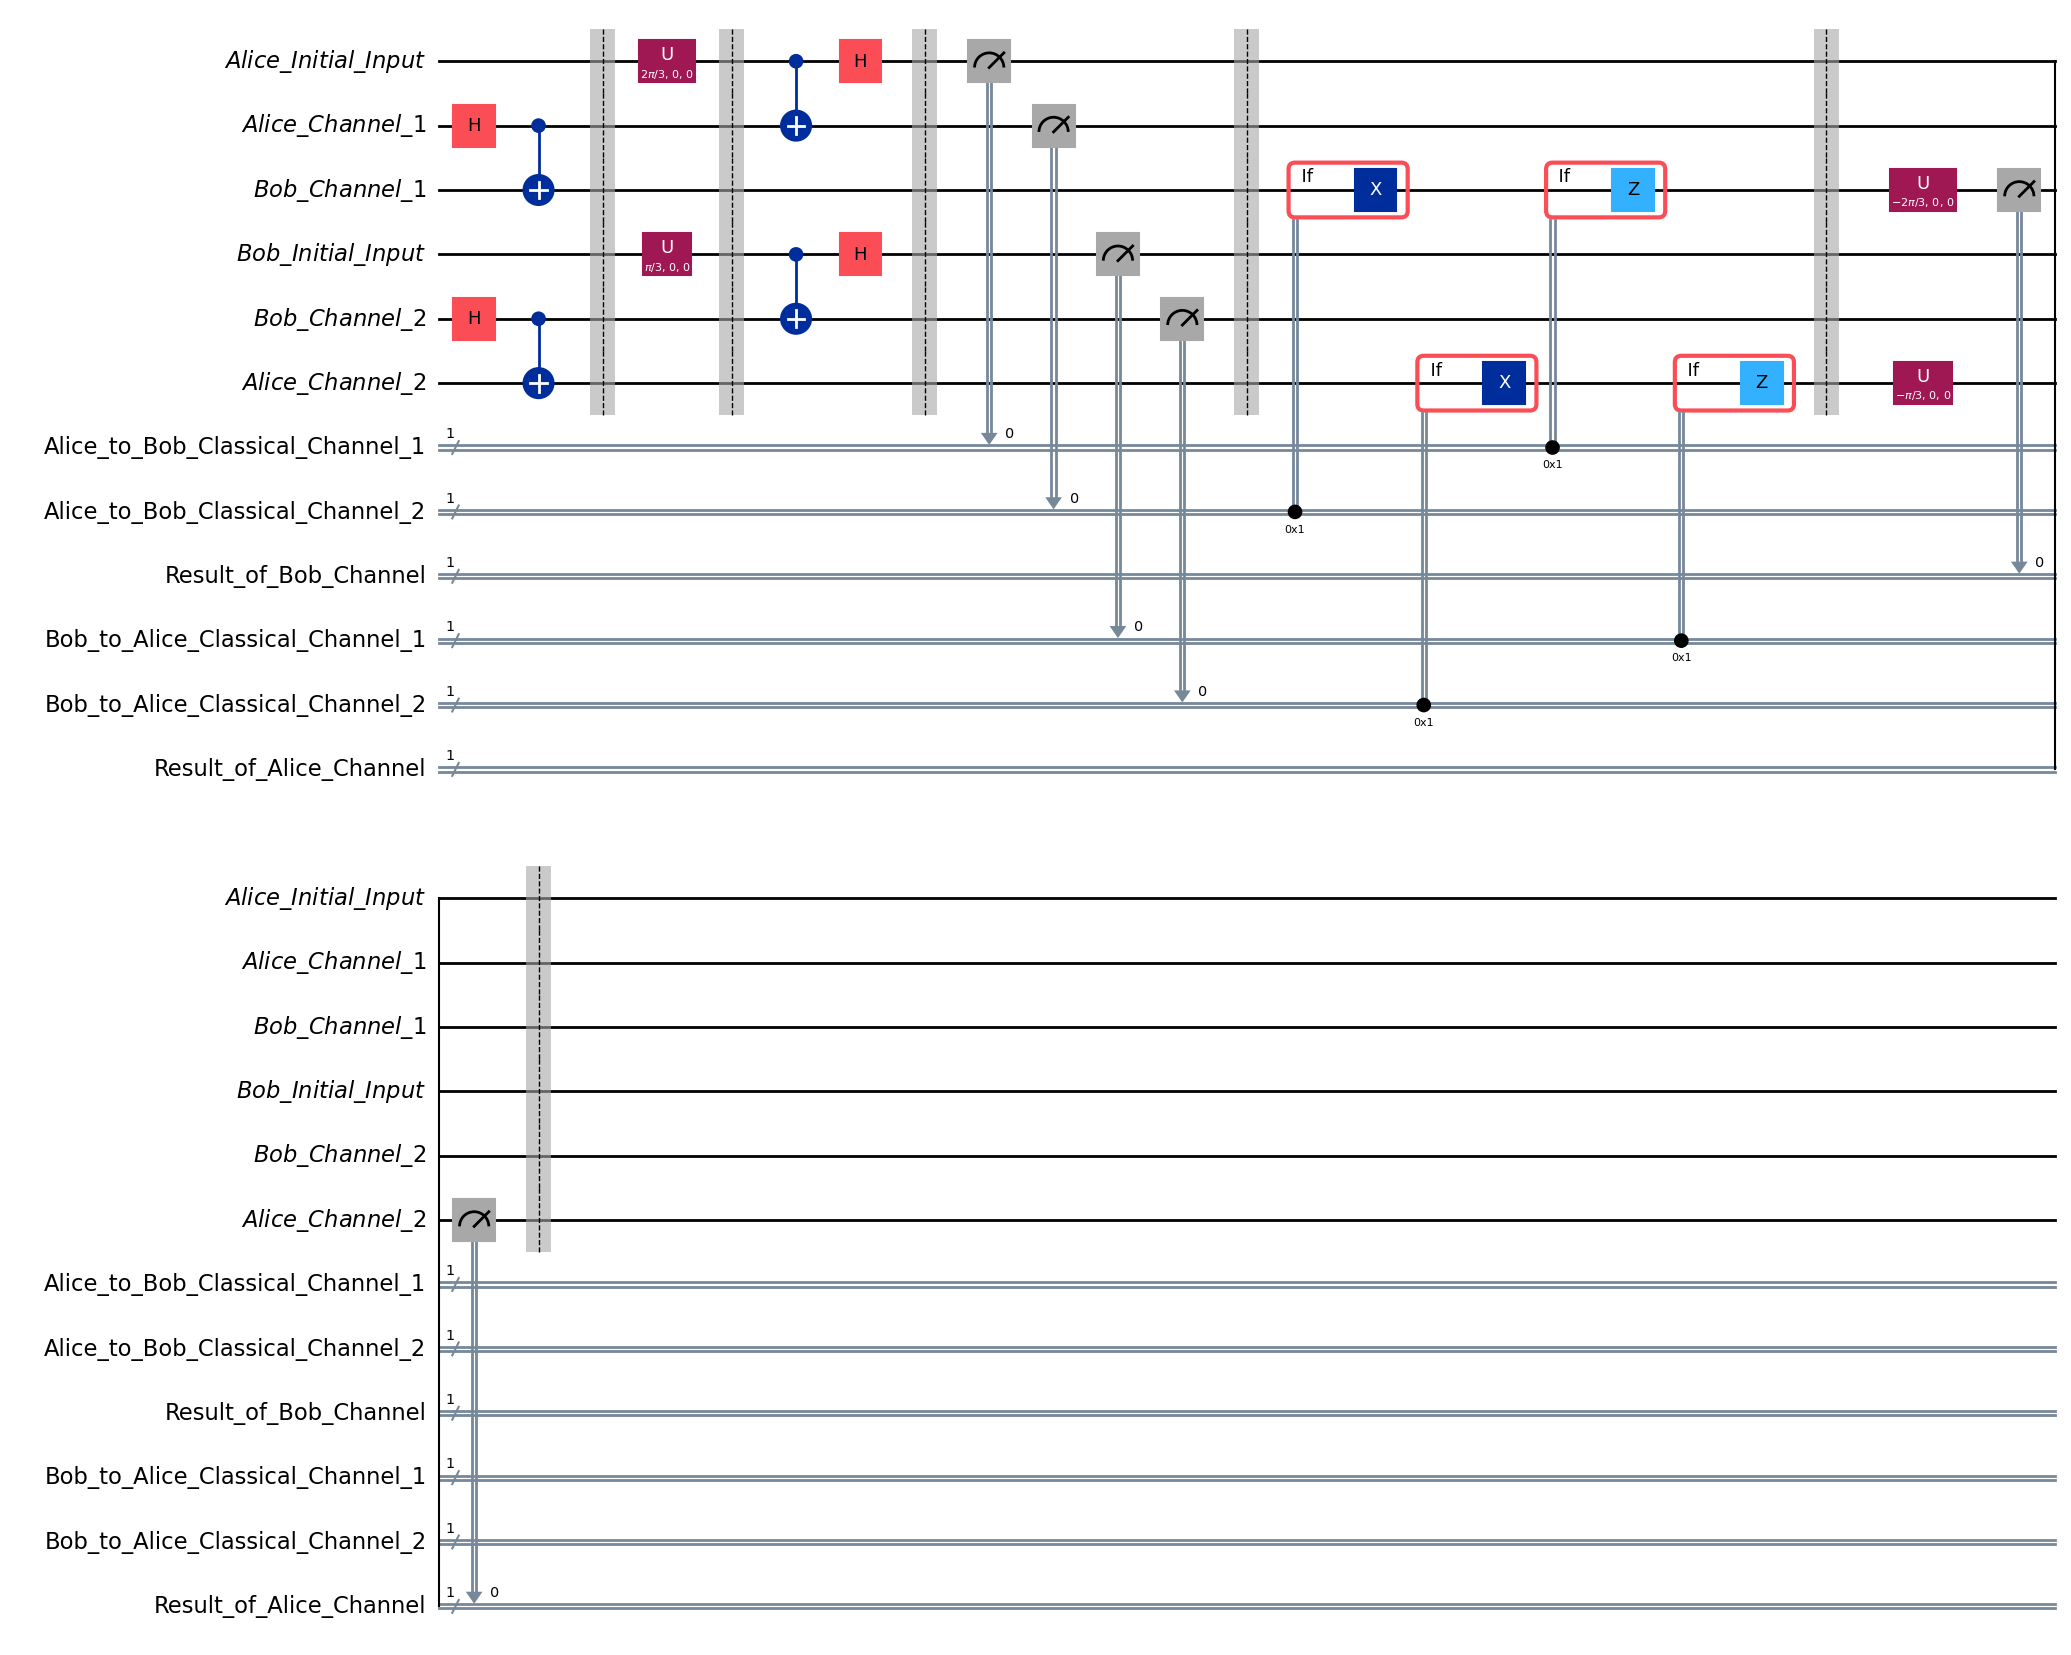

In [ ]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit.circuit.library import UGate
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram
from qiskit.result import marginal_distribution
from numpy import pi
import numpy as np

# Define the registers
# Alice's Quantum Registers
Ainput = QuantumRegister(1, "Alice_Initial_Input")
Alice1 = QuantumRegister(1, "Alice_Channel_1")
Alice2 = QuantumRegister(1, "Alice_Channel_2")
# Bob's  Quantum Registers
Binput = QuantumRegister(1, "Bob_Initial_Input")
Bob1 = QuantumRegister(1, "Bob_Channel_1")
Bob2 = QuantumRegister(1, "Bob_Channel_2")

# Classical Registers to Get Classical Information
ABc1 = ClassicalRegister(1, "Alice_to_Bob_Classical_Channel_1")
ABc2 = ClassicalRegister(1, "Alice_to_Bob_Classical_Channel_2")
BAc1 = ClassicalRegister(1, "Bob_to_Alice_Classical_Channel_1")
BAc2 = ClassicalRegister(1, "Bob_to_Alice_Classical_Channel_2")

# Channel tu get the result Bob-to-Alice Teleportation
Aresult = ClassicalRegister(1, "Result_of_Alice_Channel")
# Channel tu get the result Alice-to-Bob Teleportation
Bresult = ClassicalRegister(1, "Result_of_Bob_Channel")

# define qc circuit
qc = QuantumCircuit(Ainput, Alice1, Bob1, ABc1, ABc2, Bresult, Binput, Bob2, Alice2, BAc1, BAc2, Aresult)

# Entanglement Preparation
qc.h(Alice1)
qc.cx(Alice1, Bob1)
qc.h(Bob2)
qc.cx(Bob2, Alice2)
qc.barrier()

# Define the Initial input
Agate=UGate(theta=120*pi/180,phi=0*pi/180, lam=0*pi/180) # Alice's state:  |ϕ_a⟩ = 1/2|0⟩ + √3/2|1⟩
Bgate=UGate(theta=60*pi/180,phi=0*pi/180, lam=0*pi/180) # Bob's state: |ϕ_b⟩ = √3/2|0⟩ + 1/2|1⟩

# Input Preparation
# Initialize the qubit in the state |ϕ_a⟩
qc.append(Agate,[0])

# Initialize the qubit in the state |ϕ_b⟩
qc.append(Bgate,[3])
qc.barrier()

# Alice's operations
qc.cx(Ainput, Alice1)
qc.h(Ainput)
# Bob's operations
qc.cx(Binput, Bob2)
qc.h(Binput)
qc.barrier()

# Alice measures and sends classical bits to Bob
qc.measure(Ainput, ABc1)
qc.measure(Alice1, ABc2)
# Bob measures and sends classical bits to Alice
qc.measure(Binput, BAc1)
qc.measure(Bob2, BAc2)
qc.barrier()

# Bob uses the classical bits to conditionally apply gates
with qc.if_test((ABc2,1)):
    qc.x(Bob1)
with qc.if_test((ABc1,1)):
    qc.z(Bob1)

# Alice uses the classical bits to conditionally apply gates
with qc.if_test((BAc2,1)):
    qc.x(Alice2)
with qc.if_test((BAc1,1)):
    qc.z(Alice2)
qc.barrier()

# Bob's Measurements
qc.append(Agate.inverse(),Bob1)
qc.measure(Bob1, Bresult)

# Alice Measurements
qc.append(Bgate.inverse(),Alice2)
qc.measure(Alice2, Aresult)
qc.barrier()

qc.draw('mpl')


{'0 0 0 0 0 0': 254, '0 0 1 0 0 0': 256, '0 1 1 0 0 0': 236, '0 1 0 0 1 1': 237, '0 0 0 0 1 0': 249, '0 1 1 0 0 1': 267, '0 0 1 0 1 0': 223, '0 0 1 0 1 1': 256, '0 0 0 0 1 1': 235, '0 0 1 0 0 1': 276, '0 1 0 0 0 1': 238, '0 1 1 0 1 0': 257, '0 0 0 0 0 1': 268, '0 1 0 0 1 0': 252, '0 1 1 0 1 1': 259, '0 1 0 0 0 0': 237}


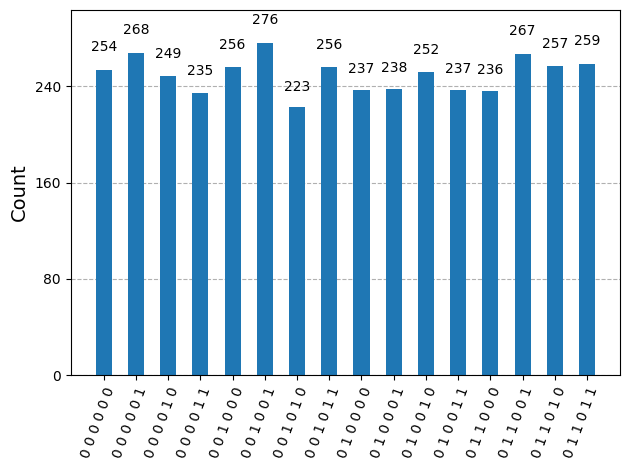

In [ ]:
simulation = AerSimulator(shots=4000).run(qc).result()
numerical_result = simulation.get_counts()
print(numerical_result)
display(plot_histogram(numerical_result))

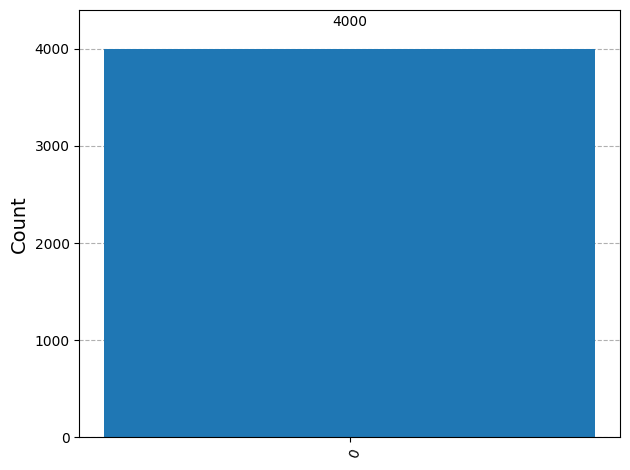

In [ ]:
filter_Alice = marginal_distribution(numerical_result, [5])
display(plot_histogram(filter_Alice))

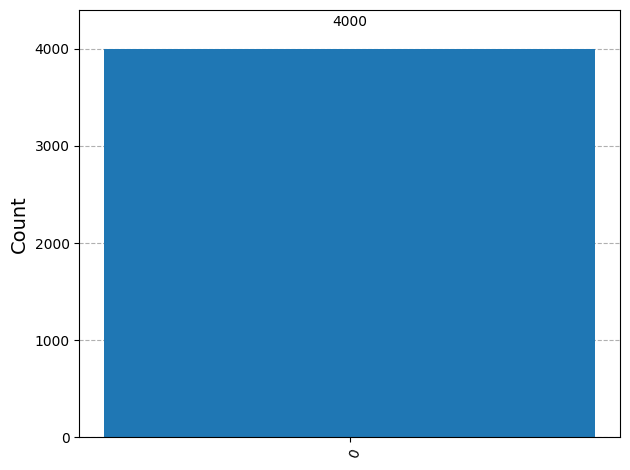

In [ ]:
filter_Bob = marginal_distribution(numerical_result, [2])
display(plot_histogram(filter_Bob))

In [ ]:
from qiskit_ibm_runtime import QiskitRuntimeService

In [ ]:
#QiskitRuntimeService.save_account(
#    token="f957a91fbd15a8bb33b04e1dc56d2d5c31bdd4f4f5126f0ad46b160900ebb9665baf762071756aa861ed2557dcd3514726a3741d7b0bf88c93938bf8f9cef58b",
#    channel="ibm_quantum",
#    overwrite=True
#    )

In [ ]:
from qiskit import transpile
# Load saved credentials
service = QiskitRuntimeService()
service.backends()

<ipython-input-68-8aada491eeaa>:4: DeprecationWarning: The "ibm_quantum" channel option is deprecated and will be sunset on 1 July. After this date, ibm_cloud will be the only valid channel. For information on migrating to the new IBM Quantum Platform on the "ibm_cloud" channel, review the migration guide https://quantum.cloud.ibm.com/docs/migration-guides/classic-iqp-to-cloud-iqp .
  service = QiskitRuntimeService()


[<IBMBackend('ibm_brisbane')>, <IBMBackend('ibm_sherbrooke')>]

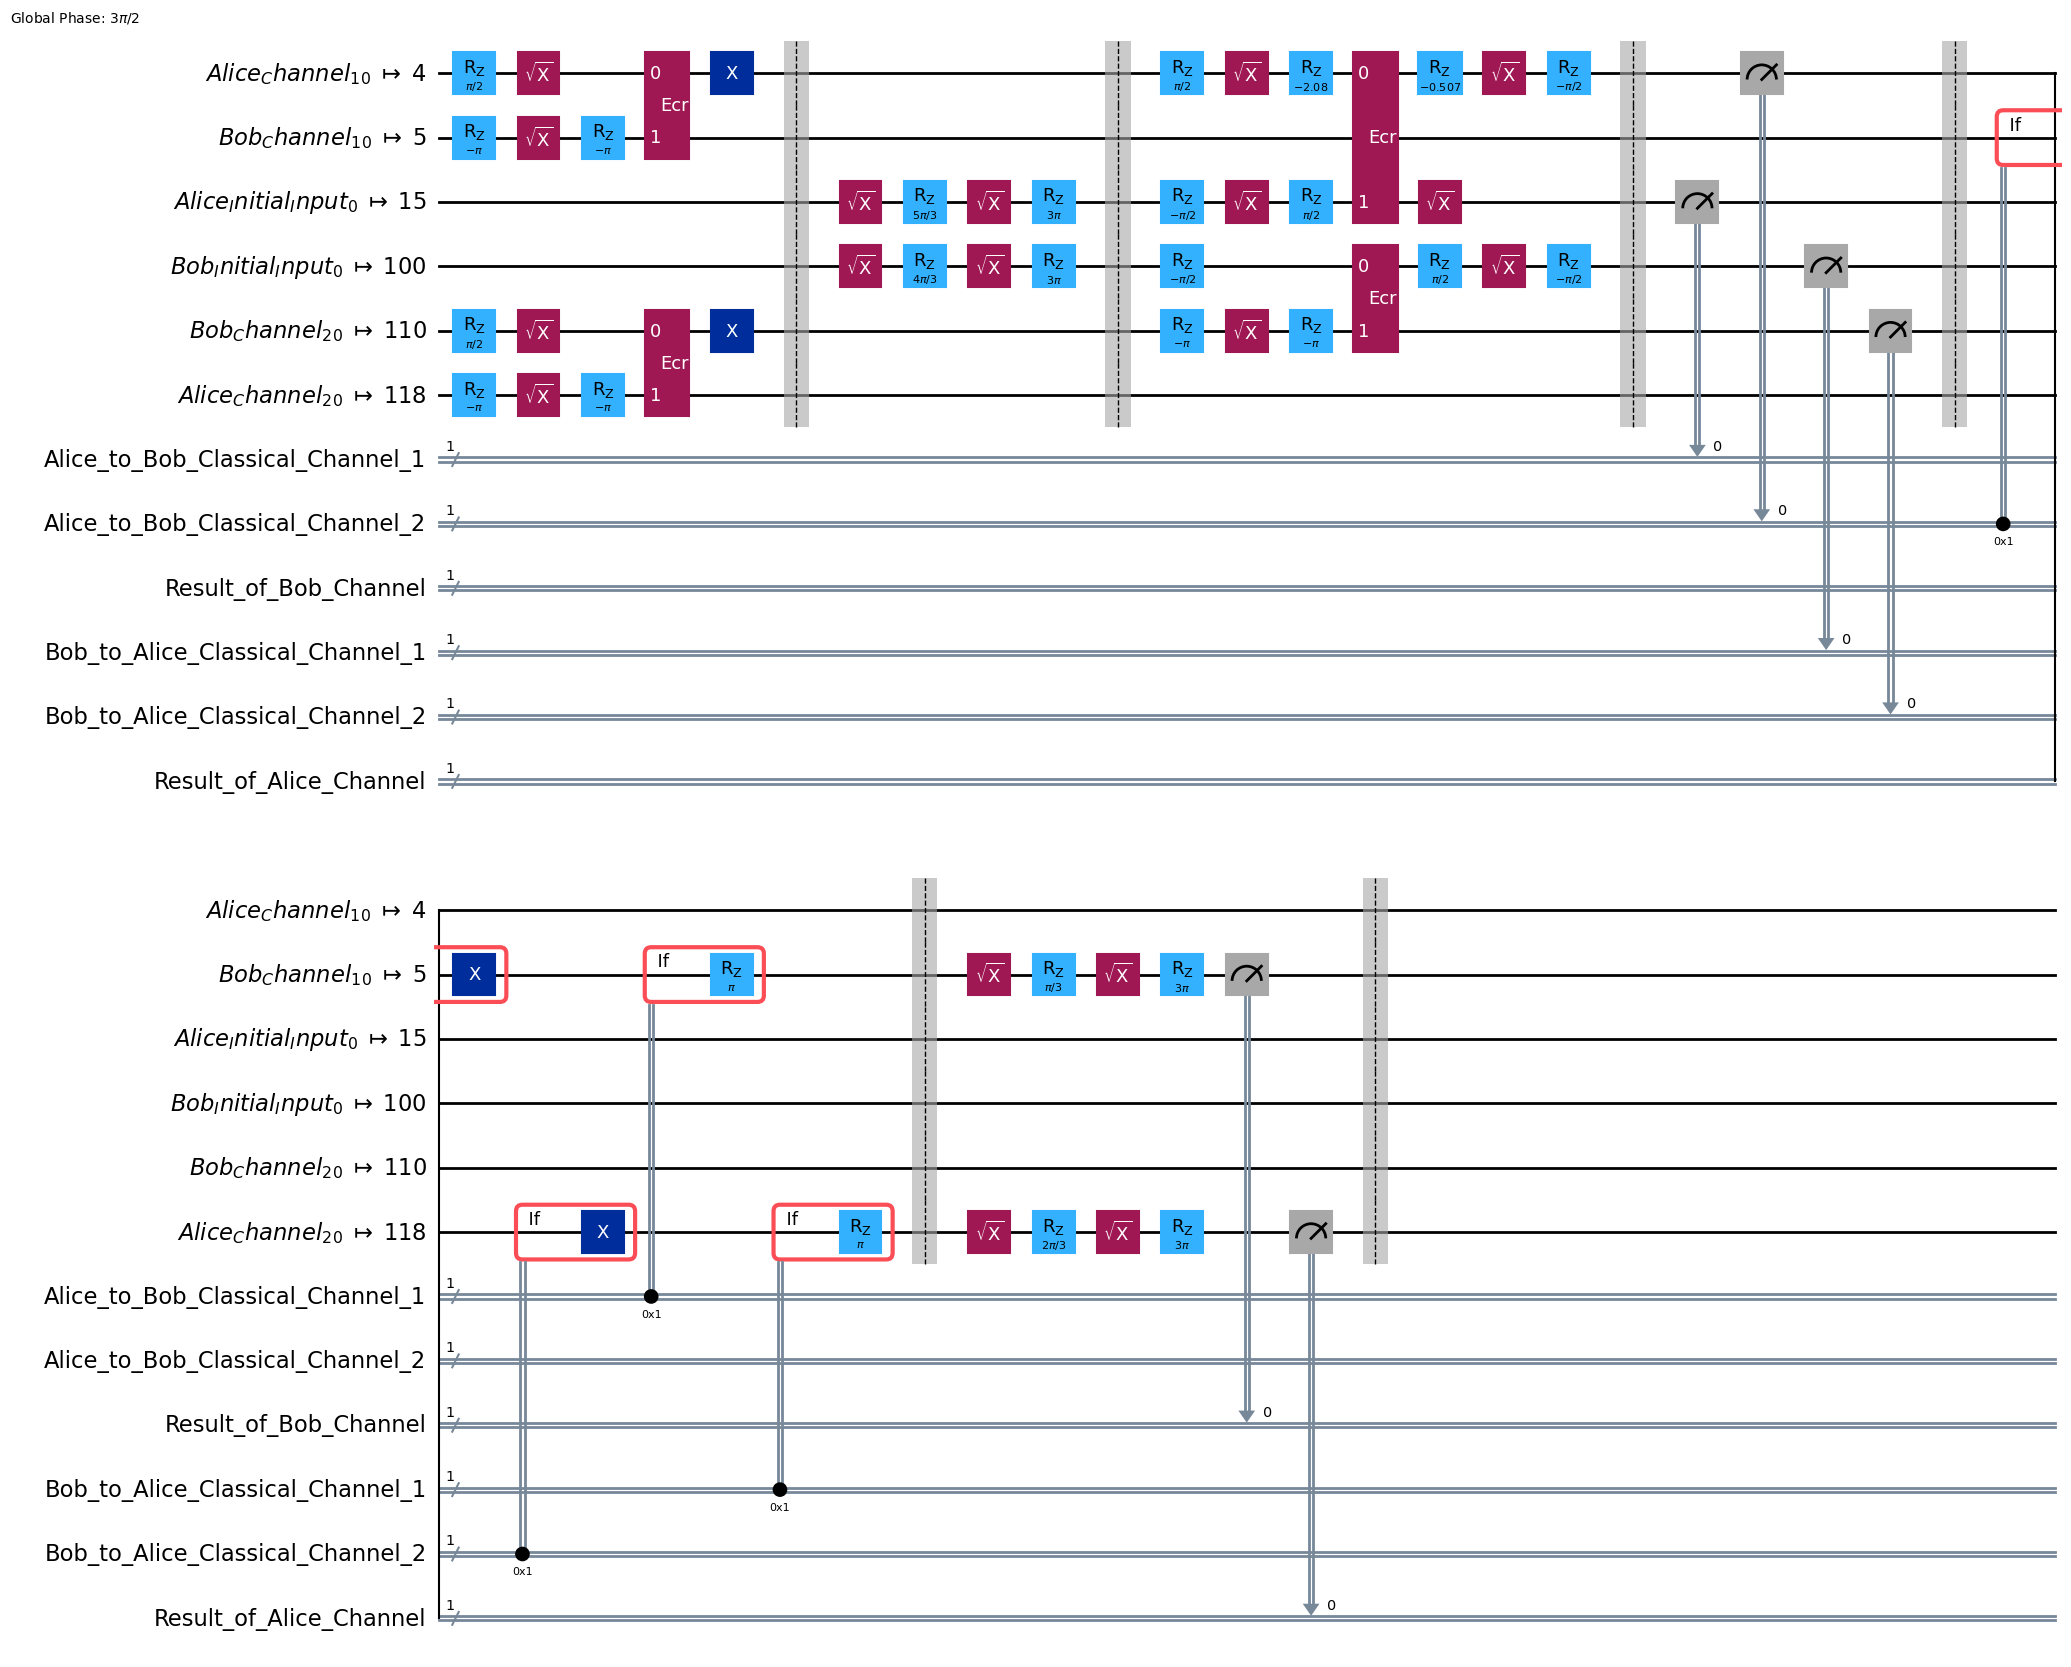

In [ ]:
backendIBM = service.backend("ibm_brisbane")
transpiledcircuit = transpile(qc, backendIBM)
transpiledcircuit.draw('mpl')

In [ ]:
from qiskit_ibm_runtime import SamplerV2 as Sampler
sampler = Sampler(backendIBM)
job = sampler.run([transpiledcircuit])
print(f"job id: {job.job_id()}")

job id: d0a221rnhqag008pgxwg


In [ ]:
from qiskit_ibm_runtime import QiskitRuntimeService

service = QiskitRuntimeService(
    channel='ibm_quantum',
    instance='ibm-q/open/main',
    token='f957a91fbd15a8bb33b04e1dc56d2d5c31bdd4f4f5126f0ad46b160900ebb9665baf762071756aa861ed2557dcd3514726a3741d7b0bf88c93938bf8f9cef58b'
)
job = service.job('d0a221rnhqag008pgxwg')
job_result = job.result()


# To get counts for a particular pub result, use
#
# pub_result = job_result[<idx>].data.<classical register>.get_counts()
#
# where <idx> is the index of the pub and <classical register> is the name of the classical register.
# You can use circuit.cregs to find the name of the classical registers.

<ipython-input-3-e56fa72b06ab>:3: DeprecationWarning: The "ibm_quantum" channel option is deprecated and will be sunset on 1 July. After this date, ibm_cloud will be the only valid channel. For information on migrating to the new IBM Quantum Platform on the "ibm_cloud" channel, review the migration guide https://quantum.cloud.ibm.com/docs/migration-guides/classic-iqp-to-cloud-iqp .
  service = QiskitRuntimeService(


In [ ]:
print(job_result)

PrimitiveResult([SamplerPubResult(data=DataBin(Alice_to_Bob_Classical_Channel_1=BitArray(<shape=(), num_shots=4096, num_bits=1>), Alice_to_Bob_Classical_Channel_2=BitArray(<shape=(), num_shots=4096, num_bits=1>), Result_of_Bob_Channel=BitArray(<shape=(), num_shots=4096, num_bits=1>), Bob_to_Alice_Classical_Channel_1=BitArray(<shape=(), num_shots=4096, num_bits=1>), Bob_to_Alice_Classical_Channel_2=BitArray(<shape=(), num_shots=4096, num_bits=1>), Result_of_Alice_Channel=BitArray(<shape=(), num_shots=4096, num_bits=1>)), metadata={'circuit_metadata': {}})], metadata={'execution': {'execution_spans': ExecutionSpans([DoubleSliceSpan(<start='2025-05-02 03:58:08', stop='2025-05-02 03:58:19', size=4096>)])}, 'version': 2})


In [ ]:
print(type(job_result))  # Is it PrimitiveResult, Result, or something else?
print(dir(job_result))   # List all available attributes

<class 'qiskit.primitives.containers.primitive_result.PrimitiveResult'>
['__annotations__', '__class__', '__class_getitem__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getitem__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__iter__', '__le__', '__len__', '__lt__', '__module__', '__ne__', '__new__', '__orig_bases__', '__parameters__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__slots__', '__str__', '__subclasshook__', '__weakref__', '_is_protocol', '_metadata', '_pub_results', 'metadata']


{'0': 3684, '1': 412}


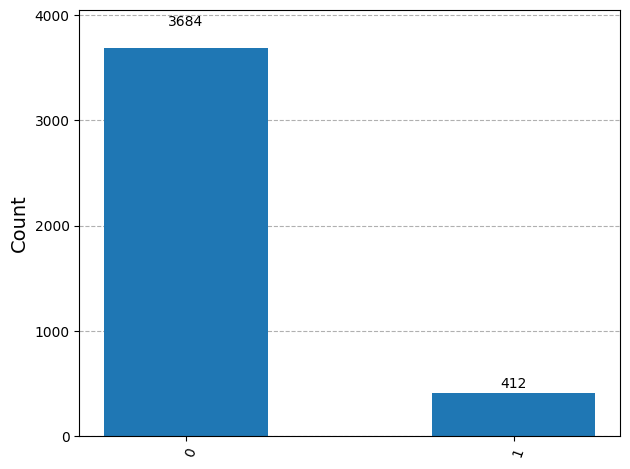

In [ ]:
from qiskit.visualization import plot_histogram
pub_result = job_result[0]  # First (and only) pub result in this case
counts = pub_result.data.Result_of_Bob_Channel.get_counts()  # Get classical register counts
print(counts)
display(plot_histogram(counts))

{'0': 3301, '1': 795}


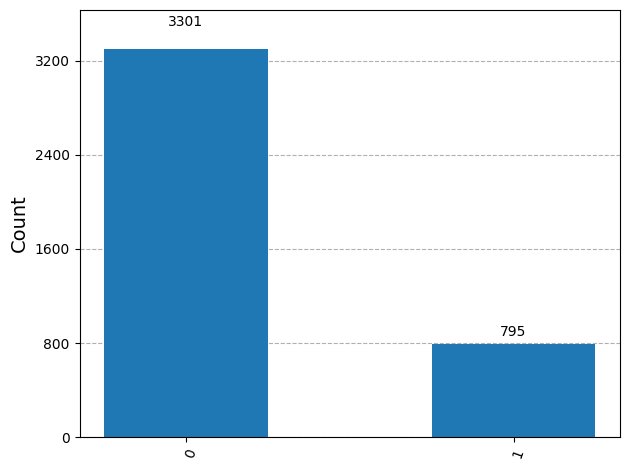

In [ ]:
pub_result = job_result[0]  # First (and only) pub result in this case
counts = pub_result.data.Result_of_Alice_Channel.get_counts()  # Get classical register counts
print(counts)
display(plot_histogram(counts))